# Subset EURO-CORDEX data for Ireland

In [35]:
import os
import glob
from datetime import datetime, timezone
import geopandas as gpd
import intake
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from climag import climag
import seaborn as sns
from climag import climag_plot

In [17]:
DATA_DIR_BASE = os.path.join("/run/media/nms/MyPassport/EURO-CORDEX")

In [3]:
# directory to store outputs
DATA_DIR = os.path.join(DATA_DIR_BASE, "IE")
os.makedirs(DATA_DIR, exist_ok=True)

In [4]:
# Moorepark met station coords
LON, LAT = -8.26389, 52.16389

In [5]:
# Ireland boundary
GPKG_BOUNDARY = os.path.join("data", "boundaries", "boundaries_all.gpkg")
ie = gpd.read_file(GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_2157_IE")
ie_bbox = gpd.read_file(
    GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_2157_IE_BBOX_DIFF"
)
ie_ne = gpd.read_file(GPKG_BOUNDARY, layer="ne_10m_land_2157_IE_BBOX_DIFF")

## Reading the local catalogue

In [8]:
JSON_FILE_PATH = os.path.join(
    "data", "EURO-CORDEX", "eurocordex_eur11_local_disk.json"
)

In [9]:
cordex_eur11_cat = intake.open_esm_datastore(JSON_FILE_PATH)

In [10]:
list(cordex_eur11_cat)

['EUR-11.CNRM-CERFACS-CNRM-CM5.SMHI.SMHI-RCA4.historical.day',
 'EUR-11.MPI-M-MPI-ESM-LR.SMHI.SMHI-RCA4.rcp45.day',
 'EUR-11.ICHEC-EC-EARTH.SMHI.SMHI-RCA4.rcp85.day',
 'EUR-11.ICHEC-EC-EARTH.SMHI.SMHI-RCA4.rcp45.day',
 'EUR-11.MOHC-HadGEM2-ES.SMHI.SMHI-RCA4.rcp85.day',
 'EUR-11.MOHC-HadGEM2-ES.SMHI.SMHI-RCA4.rcp45.day',
 'EUR-11.MOHC-HadGEM2-ES.SMHI.SMHI-RCA4.historical.day',
 'EUR-11.MPI-M-MPI-ESM-LR.SMHI.SMHI-RCA4.rcp85.day',
 'EUR-11.ICHEC-EC-EARTH.SMHI.SMHI-RCA4.historical.day',
 'EUR-11.CNRM-CERFACS-CNRM-CM5.SMHI.SMHI-RCA4.rcp45.day',
 'EUR-11.CNRM-CERFACS-CNRM-CM5.SMHI.SMHI-RCA4.rcp85.day',
 'EUR-11.MPI-M-MPI-ESM-LR.SMHI.SMHI-RCA4.historical.day']

In [11]:
cordex_eur11_cat

,unique
project,1
product_id,1
CORDEX_domain,1
institute_id,1
driving_model_id,4
experiment_id,3
member,2
model_id,1
rcm_version_id,2
frequency,1


In [12]:
cordex_eur11_cat.df.shape

(336, 28)

In [13]:
cordex_eur11_cat.df.head()

,project,product_id,CORDEX_domain,institute_id,driving_model_id,experiment_id,member,model_id,rcm_version_id,frequency,...,grid_id,time_reduction,realm,level_type,time_min,time_max,path,format,opendap_url,driving_model
0,CORDEX,output,EUR-11,SMHI,CNRM-CERFACS-CNRM-CM5,historical,r1i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19710101,19751231,data/EURO-CORDEX/RCA4/historical/CNRM-CM5/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,CNRM-CM5
1,CORDEX,output,EUR-11,SMHI,CNRM-CERFACS-CNRM-CM5,historical,r1i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19760101,19801231,data/EURO-CORDEX/RCA4/historical/CNRM-CM5/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,CNRM-CM5
2,CORDEX,output,EUR-11,SMHI,CNRM-CERFACS-CNRM-CM5,historical,r1i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19810101,19851231,data/EURO-CORDEX/RCA4/historical/CNRM-CM5/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,CNRM-CM5
3,CORDEX,output,EUR-11,SMHI,CNRM-CERFACS-CNRM-CM5,historical,r1i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19860101,19901231,data/EURO-CORDEX/RCA4/historical/CNRM-CM5/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,CNRM-CM5
4,CORDEX,output,EUR-11,SMHI,CNRM-CERFACS-CNRM-CM5,historical,r1i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19910101,19951231,data/EURO-CORDEX/RCA4/historical/CNRM-CM5/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,CNRM-CM5


## Read a subset (historical)

In [14]:
cordex_eur11 = cordex_eur11_cat.search(
    experiment_id="historical", driving_model_id="ICHEC-EC-EARTH"
)

In [15]:
cordex_eur11

,unique
project,1
product_id,1
CORDEX_domain,1
institute_id,1
driving_model_id,1
experiment_id,1
member,1
model_id,1
rcm_version_id,1
frequency,1


In [16]:
cordex_eur11.df

,project,product_id,CORDEX_domain,institute_id,driving_model_id,experiment_id,member,model_id,rcm_version_id,frequency,...,grid_id,time_reduction,realm,level_type,time_min,time_max,path,format,opendap_url,driving_model
0,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19710101,19751231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
1,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19760101,19801231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
2,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19810101,19851231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
3,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19860101,19901231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
4,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19910101,19951231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
5,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19960101,20001231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
6,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,20010101,20051231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/evsp...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
7,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19710101,19751231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/pr_E...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
8,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19760101,19801231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/pr_E...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH
9,CORDEX,output,EUR-11,SMHI,ICHEC-EC-EARTH,historical,r12i1p1,SMHI-RCA4,v1,day,...,None,None,None,None,19810101,19851231,data/EURO-CORDEX/RCA4/historical/EC-EARTH/pr_E...,netcdf,http://esgf1.dkrz.de/thredds/dodsC/cordex/EUR-...,EC-EARTH


In [18]:
data = xr.open_mfdataset(
    glob.glob(os.path.join(DATA_DIR_BASE, "RCA4/historical/EC-EARTH/*.nc")),
    chunks="auto",
    decode_coords="all",
)

In [19]:
# data = xr.open_mfdataset(
#     list(cordex_eur11.df["uri"]),
#     chunks="auto",
#     decode_coords="all"
# )

In [20]:
data

<xarray.Dataset>
Dimensions:       (time: 12784, rlat: 412, rlon: 424, bnds: 2)
Coordinates:
    lat           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
    lon           (rlat, rlon) float64 dask.array<chunksize=(412, 424), meta=np.ndarray>
  * rlat          (rlat) float64 -23.38 -23.27 -23.16 ... 21.62 21.73 21.84
  * rlon          (rlon) float64 -28.38 -28.27 -28.16 ... 17.94 18.05 18.16
    rotated_pole  |S1 b''
  * time          (time) datetime64[ns] 1971-01-01T12:00:00 ... 2005-12-31T12...
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(1826, 2), meta=np.ndarray>
    height        float64 2.0
Dimensions without coordinates: bnds
Data variables:
    evspsblpot    (time, rlat, rlon) float32 dask.array<chunksize=(862, 194, 200), meta=np.ndarray>
    pr            (time, rlat, rlon) float32 dask.array<chunksize=(862, 194, 200), meta=np.ndarray>
    rsds          (time, rlat, rlon) float32 dask.array<chunksize=(862, 194, 200), meta=np.ndarray>
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(862, 194, 200), meta=np.ndarray>
Attributes: (12/22)
    Conventions:                    CF-1.4
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2013-06-24-T01:07:21Z
    experiment:                     historical
    experiment_id:                  historical
    driving_experiment:             ICHEC-EC-EARTH, historical, r12i1p1
    ...                             ...
    product:                        output
    references:                     http://www.smhi.se/en/Research/Research-d...
    tracking_id:                    3315f9a7-cd0f-419c-89e5-42766ea8386d
    rossby_comment:                 201137: CORDEX Europe 0.11 deg | RCA4 v1 ...
    rossby_run_id:                  201137
    rossby_grib_path:               /nobackup/rossby16/rossby/joint_exp/corde...

In [21]:
# using Moorepark met station coordinates
cds = climag.rotated_pole_point(data=data, lon=LON, lat=LAT)

In [22]:
# copy CRS
data_crs = data.rio.crs

In [23]:
data_crs

CRS.from_wkt('GEOGCRS["undefined",BASEGEOGCRS["undefined",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],DERIVINGCONVERSION["Pole rotation (netCDF CF convention)",METHOD["Pole rotation (netCDF CF convention)"],PARAMETER["Grid north pole latitude (netCDF CF convention)",39.25,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["Grid north pole longitude (netCDF CF convention)",-162,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["North pole grid longitude (netCDF CF convention)",0,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CS[ellipsoidal,2],AXIS["longitude",east,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["latitude",north,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]]')

In [24]:
# subset for reference period and spin-up year
data = data.sel(time=slice("1975", "2005"))

In [25]:
# copy time_bnds coordinates
data_time_bnds = data.coords["time_bnds"]

## Ireland subset

In [27]:
# clip to Ireland's boundary
data = data.rio.clip(ie.buffer(6500).to_crs(data_crs), all_touched=True)

In [28]:
# number of grid cells with data
len(
    data.groupby("time.season")
    .mean(dim="time")["tas"][0]
    .values.flatten()[
        np.isfinite(
            data.groupby("time.season")
            .mean(dim="time")["tas"][0]
            .values.flatten()
        )
    ]
)

765

## Visualise fields

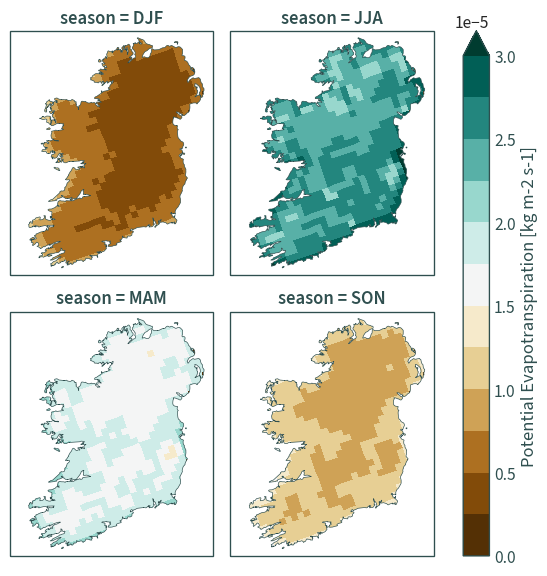

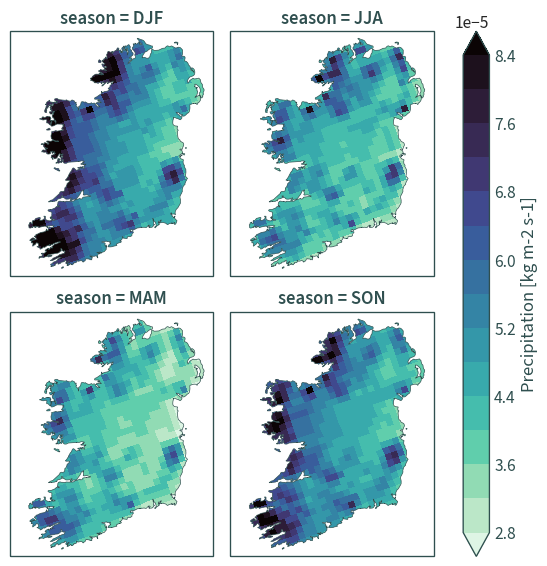

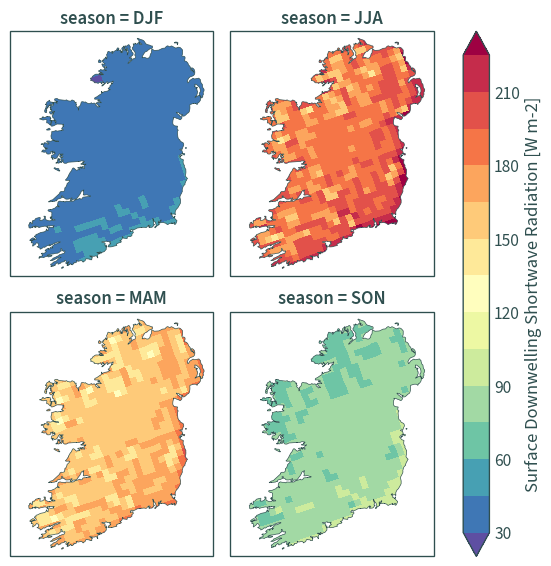

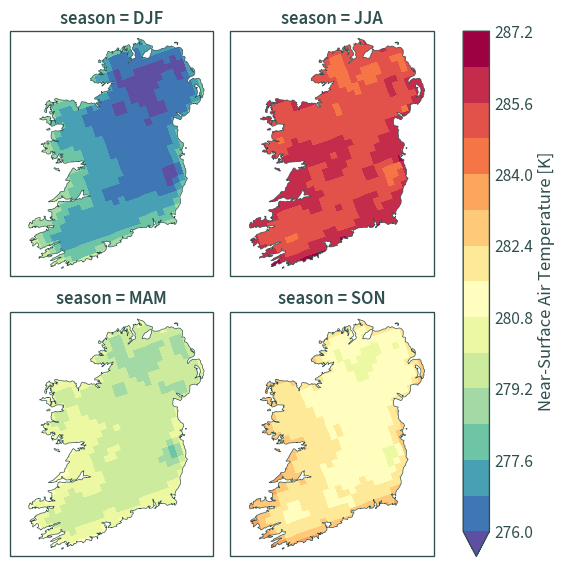

In [53]:
for var in data.data_vars:
    climag_plot.plot_averages(
        data=data.sel(time=slice("1976", "2005")),
        var=var,
        averages="season",
        boundary_data=ie_ne,
        cbar_levels=15,
    )

### Time series

In [54]:
data_ie = data.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest")

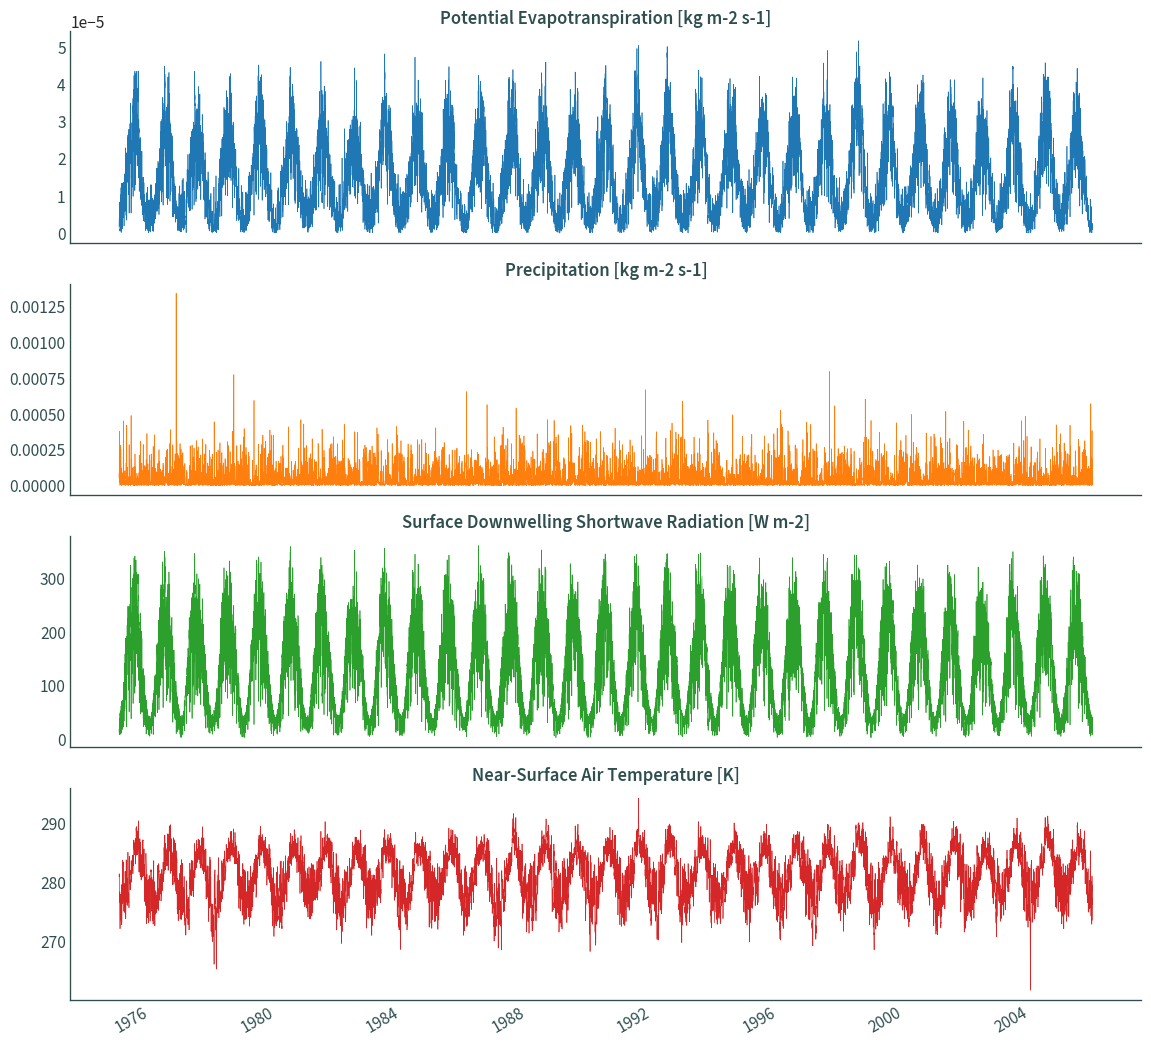

In [55]:
data_ie_df = pd.DataFrame({"time": data_ie["time"]})
# configure plot title
plot_title = []
for var in data_ie.data_vars:
    data_ie_df[var] = data_ie[var]
    plot_title.append(
        f"{data_ie[var].attrs['long_name']} [{data_ie[var].attrs['units']}]"
    )

data_ie_df.set_index("time", inplace=True)

data_ie_df.plot(
    subplots=True,
    layout=(4, 1),
    figsize=(12, 11),
    legend=False,
    xlabel="",
    title=plot_title,
    linewidth=0.5,
)

sns.despine()
plt.tight_layout()
plt.show()

### Box plots

In [56]:
data_ie = data_ie.sel(time=slice("1976", "2005"))

In [57]:
data_ie_df = pd.DataFrame({"time": data_ie["time"]})
for var in data_ie.data_vars:
    data_ie_df[var] = data_ie[var]
data_ie_df.set_index("time", inplace=True)

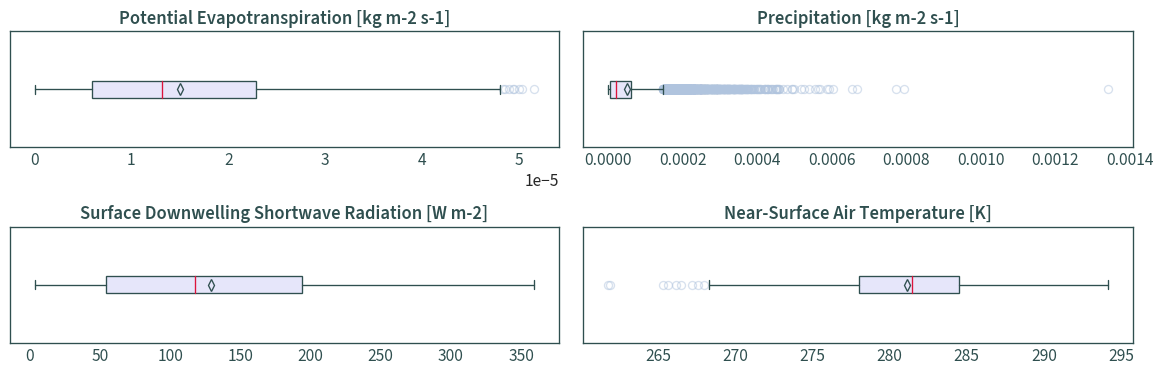

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
for ax, var in zip(axs.flat, data_ie.data_vars):
    data_ie_df.plot.box(
        column=var,
        vert=False,
        showmeans=True,
        ax=ax,
        patch_artist=True,
        color={
            "medians": "Crimson",
            "whiskers": "DarkSlateGrey",
            "caps": "DarkSlateGrey",
        },
        boxprops={"facecolor": "Lavender", "color": "DarkSlateGrey"},
        meanprops={
            "markeredgecolor": "DarkSlateGrey",
            "marker": "d",
            "markerfacecolor": (1, 1, 0, 0),  # transparent
        },
        flierprops={
            "alpha": 0.5,
            "markeredgecolor": "LightSteelBlue",
            "zorder": 1,
        },
    )
    ax.set_title(
        f"{data_ie[var].attrs['long_name']} [{data_ie[var].attrs['units']}]"
    )
    ax.set(yticklabels=[])
plt.tight_layout()
plt.show()

## Calculate photosynthetically active radiation

In [59]:
# Papaioannou et al. (1993) - irradiance ratio
data = data.assign(PAR=data["rsds"] * 0.473)

In [61]:
# compare radiation vals
data_ie = data.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest").sel(
    time=slice("1997", "1999")
)

In [62]:
data_ie_df = pd.DataFrame({"time": data_ie["time"]})
for var in ["rsds", "PAR"]:
    data_ie_df[var] = data_ie[var]

data_ie_df.set_index("time", inplace=True)

In [63]:
data_ie = data.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest").sel(
    time=slice("1976", "2005")
)

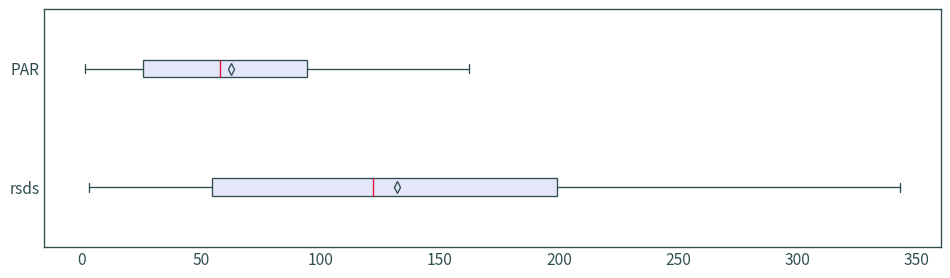

In [66]:
fig = data_ie_df.plot.box(
    vert=False,
    showmeans=True,
    figsize=(10, 3),
    patch_artist=True,
    color={
        "medians": "Crimson",
        "whiskers": "DarkSlateGrey",
        "caps": "DarkSlateGrey",
    },
    boxprops={"facecolor": "Lavender", "color": "DarkSlateGrey"},
    meanprops={
        "markeredgecolor": "DarkSlateGrey",
        "marker": "d",
        "markerfacecolor": (1, 1, 0, 0),  # transparent
    },
    flierprops={
        "alpha": 0.5,
        "markeredgecolor": "LightSteelBlue",
        "zorder": 1,
    },
)
plt.tight_layout()
plt.show()

## Convert units and rename variables

In [67]:
for v in data.data_vars:
    var_attrs = data[v].attrs  # extract attributes
    if v == "tas":
        var_attrs["units"] = "°C"
        data[v] = data[v] - 273.15
        var_attrs["note"] = "Converted from K to °C by subtracting 273.15"
    elif v == "PAR":
        var_attrs["units"] = "MJ m⁻² day⁻¹"
        data[v] = data[v] * (60 * 60 * 24 / 1e6)
        var_attrs["long_name"] = "Surface Photosynthetically Active Radiation"
        var_attrs["note"] = (
            "Calculated by multiplying surface downwelling shortwave "
            "radiation with an irradiance ratio of 0.473 based on Papaioannou "
            "et al. (1993); converted from W m⁻² to MJ m⁻² day⁻¹ by "
            "multiplying 0.0864 based on the FAO Irrigation and Drainage "
            "Paper No. 56 (Allen et al., 1998, p. 45)"
        )
    elif v in ("pr", "evspsblpot"):
        var_attrs["units"] = "mm day⁻¹"
        data[v] = data[v] * 60 * 60 * 24
        var_attrs["note"] = (
            "Converted from kg m⁻² s⁻¹ to mm day⁻¹ by multiplying 86,400,"
            " assuming a water density of 1,000 kg m⁻³"
        )
    data[v].attrs = var_attrs  # reassign attributes

In [68]:
# rename variables
data = data.rename({"tas": "T", "pr": "PP", "evspsblpot": "PET"})

In [69]:
# assign dataset name
for x in ["CNRM-CM5", "EC-EARTH", "HadGEM2-ES", "MPI-ESM-LR"]:
    if x in data.attrs["driving_model_id"]:
        data.attrs["dataset"] = (
            f"IE_EURO-CORDEX_RCA4_{x}_{data.attrs['experiment_id']}"
        )

In [70]:
# keep only required variables
data = data.drop_vars(["rsds"])

In [71]:
# assign attributes to the data
data.attrs["comment"] = (
    "This dataset has been clipped with the Island of Ireland's boundary and "
    "units have been converted. "
    "Last updated: "
    + str(datetime.now(tz=timezone.utc))
    + " by nstreethran@ucc.ie."
)

In [72]:
# reassign time_bnds
data.coords["time_bnds"] = data_time_bnds

In [73]:
# reassign CRS
data.rio.write_crs(data_crs, inplace=True)

<xarray.Dataset>
Dimensions:       (rlat: 33, rlon: 37, time: 11323, bnds: 2)
Coordinates:
    lat           (rlat, rlon) float64 dask.array<chunksize=(33, 37), meta=np.ndarray>
    lon           (rlat, rlon) float64 dask.array<chunksize=(33, 37), meta=np.ndarray>
  * rlat          (rlat) float64 3.685 3.795 3.905 4.015 ... 6.985 7.095 7.205
  * rlon          (rlon) float64 -17.27 -17.16 -17.05 ... -13.53 -13.41 -13.3
  * time          (time) datetime64[ns] 1975-01-01T12:00:00 ... 2005-12-31T12...
    height        float64 2.0
    rotated_pole  |S1 b''
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(365, 2), meta=np.ndarray>
    spatial_ref   int64 0
Dimensions without coordinates: bnds
Data variables:
    PET           (time, rlat, rlon) float32 dask.array<chunksize=(263, 33, 37), meta=np.ndarray>
    PP            (time, rlat, rlon) float32 dask.array<chunksize=(263, 33, 37), meta=np.ndarray>
    T             (time, rlat, rlon) float32 dask.array<chunksize=(263, 33, 37), meta=np.ndarray>
    PAR           (time, rlat, rlon) float32 dask.array<chunksize=(263, 33, 37), meta=np.ndarray>
Attributes: (12/24)
    Conventions:                    CF-1.4
    contact:                        rossby.cordex@smhi.se
    creation_date:                  2013-06-24-T01:07:21Z
    experiment:                     historical
    experiment_id:                  historical
    driving_experiment:             ICHEC-EC-EARTH, historical, r12i1p1
    ...                             ...
    tracking_id:                    3315f9a7-cd0f-419c-89e5-42766ea8386d
    rossby_comment:                 201137: CORDEX Europe 0.11 deg | RCA4 v1 ...
    rossby_run_id:                  201137
    rossby_grib_path:               /nobackup/rossby16/rossby/joint_exp/corde...
    dataset:                        IE_EURO-CORDEX_RCA4_EC-EARTH_historical
    comment:                        This dataset has been clipped with the Is...

In [74]:
data.rio.crs

CRS.from_wkt('GEOGCRS["undefined",BASEGEOGCRS["undefined",DATUM["World Geodetic System 1984",ELLIPSOID["WGS 84",6378137,298.257223563,LENGTHUNIT["metre",1]],ID["EPSG",6326]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433],ID["EPSG",8901]]],DERIVINGCONVERSION["Pole rotation (netCDF CF convention)",METHOD["Pole rotation (netCDF CF convention)"],PARAMETER["Grid north pole latitude (netCDF CF convention)",39.25,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["Grid north pole longitude (netCDF CF convention)",-162,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],PARAMETER["North pole grid longitude (netCDF CF convention)",0,ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]],CS[ellipsoidal,2],AXIS["longitude",east,ORDER[1],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]],AXIS["latitude",north,ORDER[2],ANGLEUNIT["degree",0.0174532925199433,ID["EPSG",9122]]]]')

## Visualise

### Seasonal averages

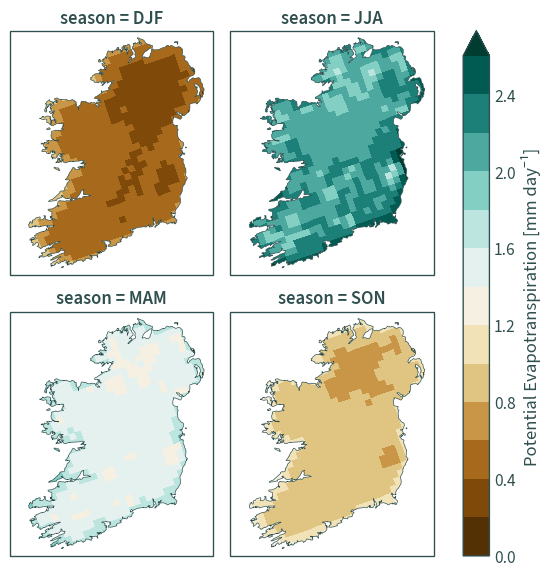

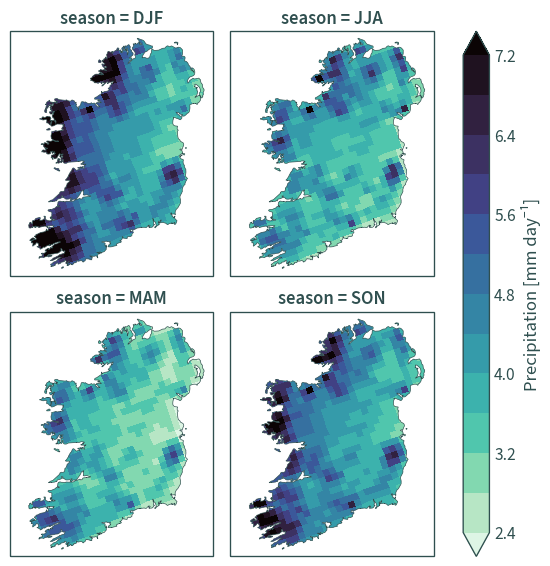

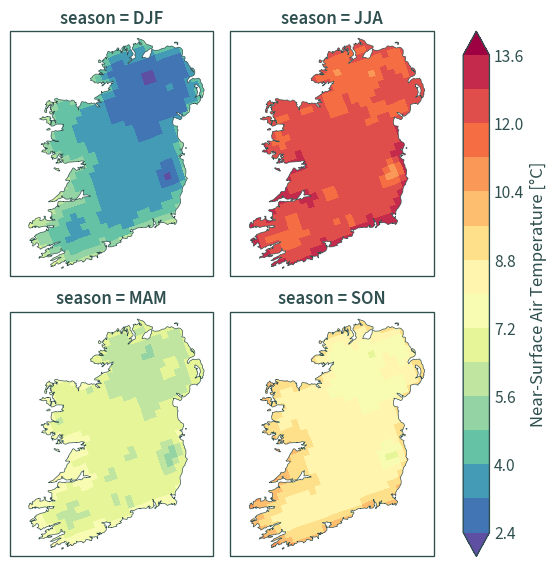

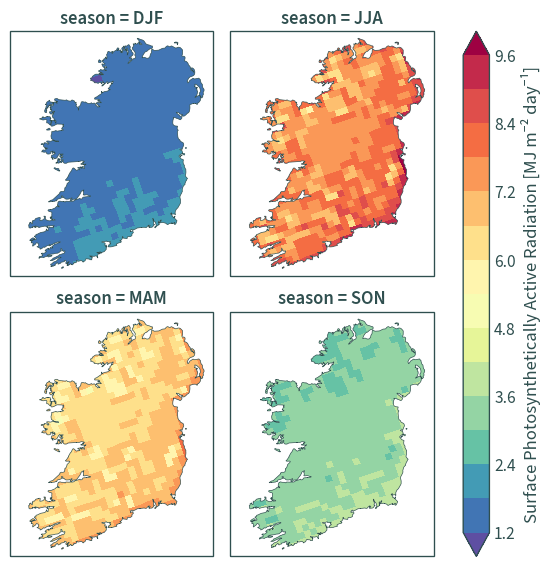

In [75]:
for var in data.data_vars:
    climag_plot.plot_averages(
        data=data.sel(time=slice("1976", "2005")),
        var=var,
        averages="season",
        boundary_data=ie_ne,
        cbar_levels=15,
    )

### Time series

In [76]:
data_ie = data.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest")

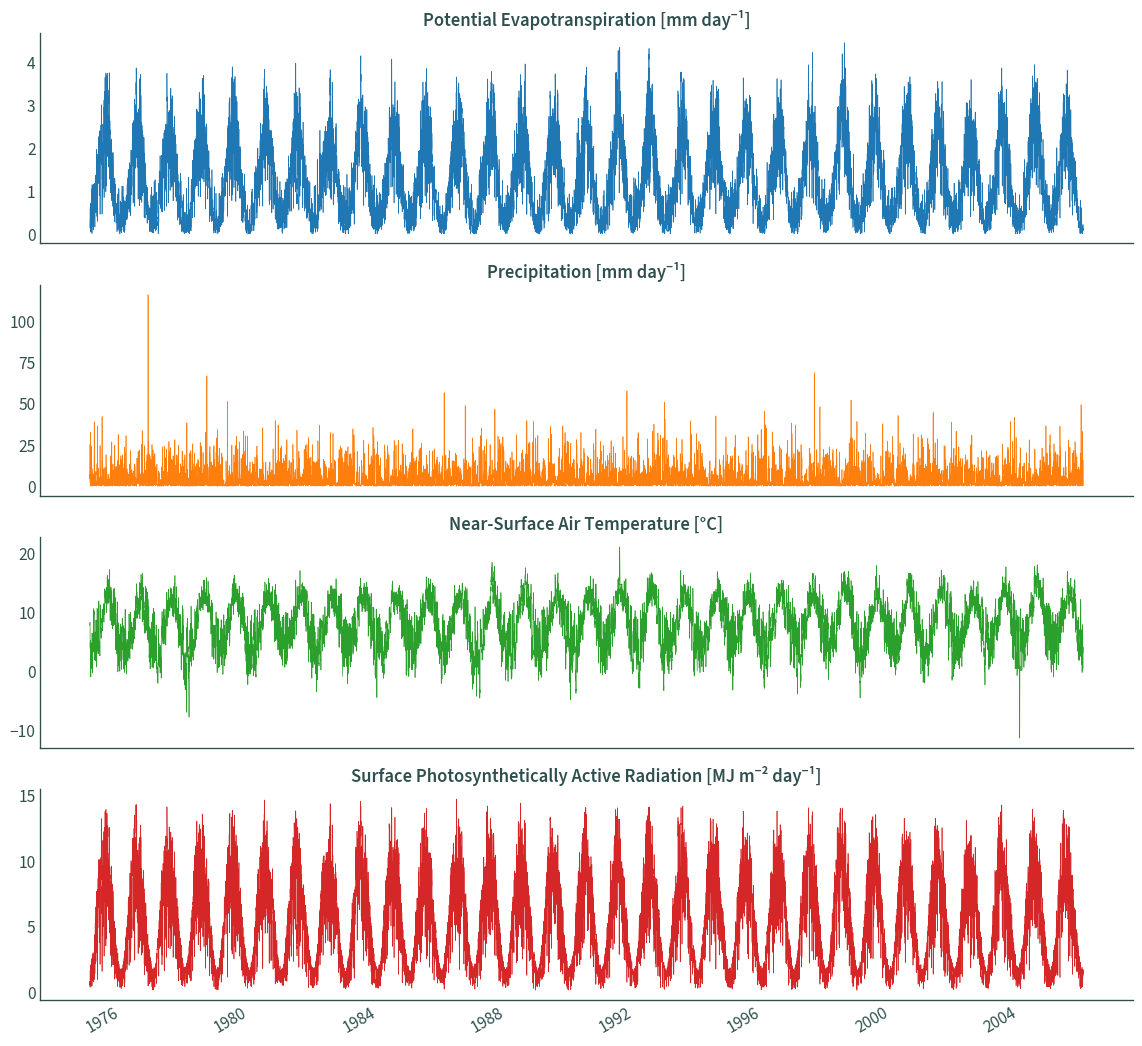

In [77]:
data_ie_df = pd.DataFrame({"time": data_ie["time"]})
# configure plot title
plot_title = []
for var in data_ie.data_vars:
    data_ie_df[var] = data_ie[var]
    plot_title.append(
        f"{data_ie[var].attrs['long_name']} [{data_ie[var].attrs['units']}]"
    )

data_ie_df.set_index("time", inplace=True)

data_ie_df.plot(
    subplots=True,
    layout=(4, 1),
    figsize=(12, 11),
    legend=False,
    xlabel="",
    title=plot_title,
    linewidth=0.5,
)
sns.despine()
plt.tight_layout()
plt.show()

### Box plots

In [78]:
data_ie = data.sel({"rlon": cds[0], "rlat": cds[1]}, method="nearest").sel(
    time=slice("1976", "2005")
)

data_ie_df = pd.DataFrame({"time": data_ie["time"]})
for var in data_ie.data_vars:
    data_ie_df[var] = data_ie[var]
data_ie_df.set_index("time", inplace=True)

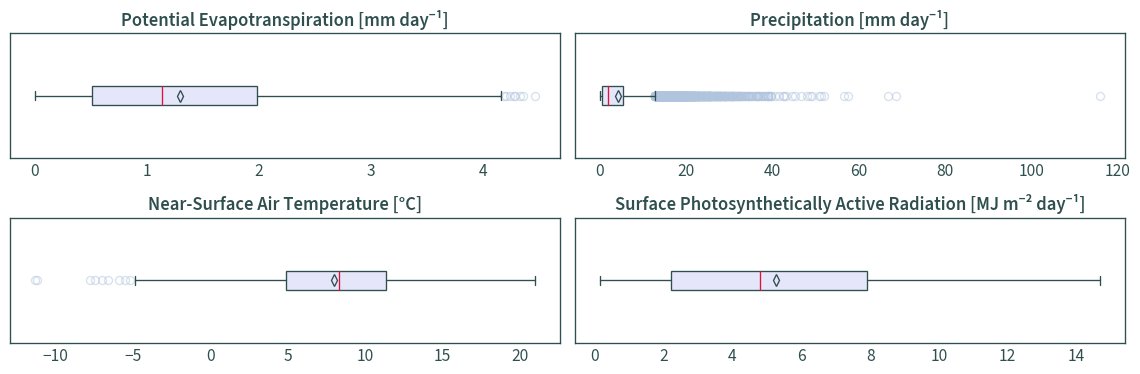

In [79]:
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
for ax, var in zip(axs.flat, data_ie.data_vars):
    data_ie_df.plot.box(
        column=var,
        vert=False,
        showmeans=True,
        ax=ax,
        patch_artist=True,
        color={
            "medians": "Crimson",
            "whiskers": "DarkSlateGrey",
            "caps": "DarkSlateGrey",
        },
        boxprops={"facecolor": "Lavender", "color": "DarkSlateGrey"},
        meanprops={
            "markeredgecolor": "DarkSlateGrey",
            "marker": "d",
            "markerfacecolor": (1, 1, 0, 0),  # transparent
        },
        flierprops={
            "alpha": 0.5,
            "markeredgecolor": "LightSteelBlue",
            "zorder": 1,
        },
    )
    ax.set_title(
        f"{data_ie[var].attrs['long_name']} [{data_ie[var].attrs['units']}]"
    )
    ax.set(yticklabels=[])
plt.tight_layout()
plt.show()